## 파이썬 지도학습
# 커널 서포트벡터 머신 (2)

- 유방암 데이터에 커널 SVM 을 적용해 보겠습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [2]:
malignant = cancer.data[cancer.target==0] # 37%
benign = cancer.data[cancer.target==1]    # 63%

malignant.shape, benign.shape

((212, 30), (357, 30))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
display(train_score, test_score)

1.0

0.7062937062937062

In [4]:
pred_y = model.predict(X_test)
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

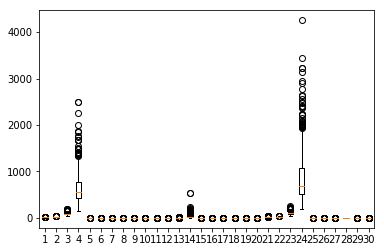

In [5]:
plt.boxplot(cancer.data)
pass

### 정규화 적용

In [8]:
X = cancer.data
y = cancer.target

In [9]:
X_norm = (X - X.mean(axis=0))/X.std(axis=0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y)

model = SVC()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
display(train_score, test_score)

0.9859154929577465

0.9790209790209791

- 학습/테스트셋을 분리후 정규화를 적용하여야 한다

In [7]:
X = cancer.data
y = cancer.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
m = X_train.mean(axis=0)
s = X_train.std(axis=0)

X_train_norm = (X_train-m)/s
X_test_norm = (X_test-m)/s

model = SVC()
model.fit(X_train_norm, y_train)

train_score = model.score(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
display(train_score, test_score)

0.9882629107981221

0.9790209790209791

- 틀린 샘플 분석

In [16]:
pred_y = model.predict(X_test_norm)
np.where(pred_y!=y_test)

(array([  6, 132], dtype=int64),)

In [17]:
idx = np.where(pred_y!=y_test)[0]
idx

array([  6, 132], dtype=int64)

In [18]:
display(y_test[idx], pred_y[idx])

array([1, 0])

array([0, 1])

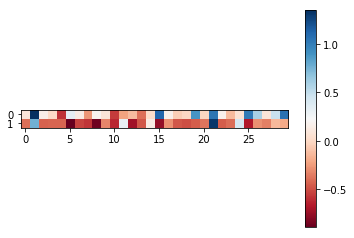

In [19]:
plt.imshow(X_test_norm[idx], cmap='RdBu')
plt.colorbar()

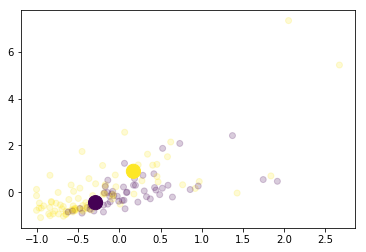

In [26]:
col1=16
col2=19
plt.scatter(X_test_norm[:,col1], X_test_norm[:,col2], c=y_test, alpha=0.2)
plt.scatter(X_test_norm[idx,col1], X_test_norm[idx,col2], c=y_test[idx], s=200)

- 속성을 2개로 제한

In [11]:
X = cancer.data[:,[0,9]]

X_train, X_test, y_train, y_test = train_test_split(X, y)
m = X_train.mean(axis=0)
s = X_train.std(axis=0)

X_train_norm = (X_train-m)/s
X_test_norm = (X_test-m)/s

model = SVC(gamma=10)
model.fit(X_train_norm, y_train)

train_score = model.score(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
display(train_score, test_score)

0.9131455399061033

0.8741258741258742

(-2.5137365713213433,
 4.491016148568882,
 -2.3144290561558947,
 5.391961106655539)

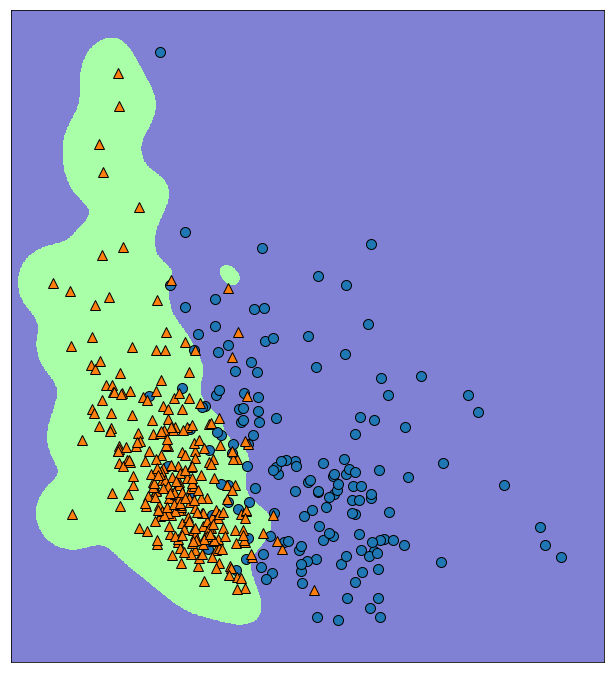

In [12]:
import mglearn

plt.figure(figsize=[12,12])
mglearn.plots.plot_2d_classification(model, X_train_norm, eps=0.5, alpha=0.5)
mglearn.discrete_scatter(X_train_norm[:,0], X_train_norm[:,1], y_train)
plt.axis('scaled')

### 정규화 적용 이유

- 위의 결과를 보면, 테스트세트에 대한 점수가 60% 를 잘 넘지 못합니다.
- 모든 데이터를 양성이라고 판단하더라도 최소한 63% 는 맞출수 있습니다.
- 문제의 원인은 유방암 데이터의 스케일이 아주 차이가 크기 때문입니다.

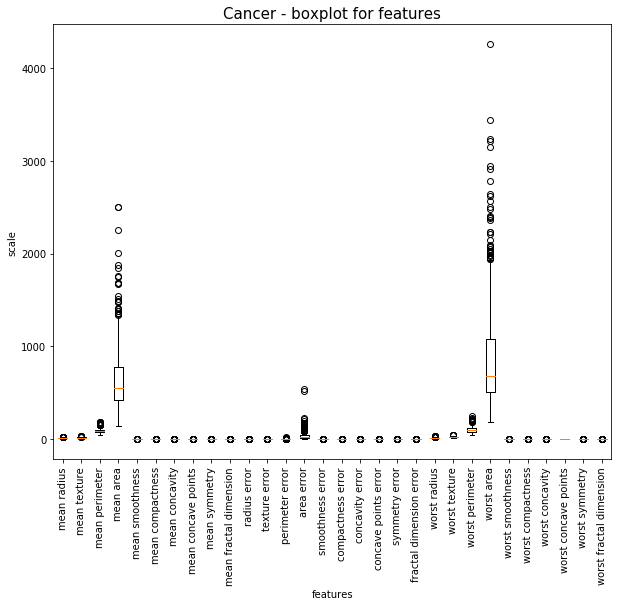

In [5]:
fig=plt.figure(figsize=[10,8])
plt.title('Cancer - boxplot for features',fontsize=15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1,cancer.feature_names,rotation=90)
plt.xlabel('features')
plt.ylabel('scale')
print('')

- 커널 SVM 은 스케일에 아주 민감합니다. 많은 차원과 큰 차원의 다항식, 복잡한 곡선함수를 사용하기 때문에 조금만 스케일이 차이가 나도 훈련데이터에 과대적합 되어 버립니다.
- <font color="red">커널 SVM 을 적용할 때는 반드시 **정규화(normalization)**을 해 주어야 합니다.</font>
- 머신러닝 알고리즘 중에서 **거리(distance)** 를 사용하는 함수는 반드시 정규화를 해 주어야 한다고 알아두면 좋습니다.
    1. k-NN 은 점들 사이의 거리에 기반하므로 정규화가 반드시 필요합니다.<br>
    2. 선형회귀와 로지스틱회귀는 높이값을 비교하므로 정규화가 꼭 필요한 것은 아니지만, 적용하면 좋습니다.<br>
    3. 선형 SVM 도 직선과 점들 사이의 거리를 사용하기 때문에 정규화가 꼭 필요합니다.

- 정규화의 방법은 대표적으로 2가지 방법을 사용합니다.
    1. 0과 1사이의 값으로 균등하게 비율을 조정하는 방법
    2. 평균 0, 표준편차 1의 정규분포로 변환하는 방법
- 데이터의 특성에 맞게 적당한 변환 방법을 선택합니다.
- 훈련세트와 테스트세트로 분리되었을 때에는, 훈련세트의 값을 기준으로 테스트세트를 변환해야 합니다.

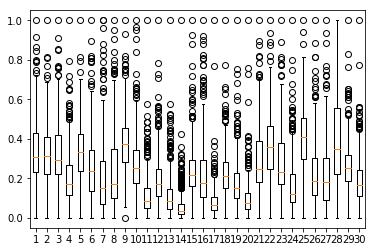

In [6]:
# 균등 비율
X_max = X_train.max(axis=0)
X_min = X_train.min(axis=0)
X_train_uni = (X_train - X_min) / (X_max - X_min)
X_test_uni = (X_test - X_min) / (X_max - X_min) # 학습데이터 값을 기준으로 변환

plt.boxplot(X_train_uni)
print('')

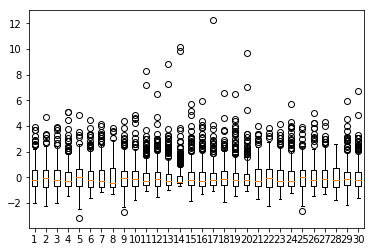

In [10]:
# 정규분포
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_norm = (X_train - X_mean) / X_std
X_test_norm = (X_test - X_mean) / X_std # 학습데이터 값을 기준으로 변환

plt.boxplot(X_train_norm)
print('')

In [8]:
model = SVC()
model.fit(X_train_uni, y_train)

train_score = model.score(X_train_uni, y_train)
test_score = model.score(X_test_uni, y_test)
display(train_score, test_score)

0.9553990610328639

0.9300699300699301

In [11]:
model = SVC()
model.fit(X_train_norm, y_train)

train_score = model.score(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
display(train_score, test_score)

0.9906103286384976

0.965034965034965

In [14]:
pred_y = model.predict(X_test_norm)
display(y_test, pred_y)

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
np.where(y_test != pred_y)

(array([ 15,  21,  36,  83, 127], dtype=int64),)

- 이제 SVC 의 중요 옵션인 C 와 gamma 값을 바꿔가며 적용해 보자.
- C 와 gamma 는 값이 커질수록 훈련데이터에 맞추는 경향이 있다.

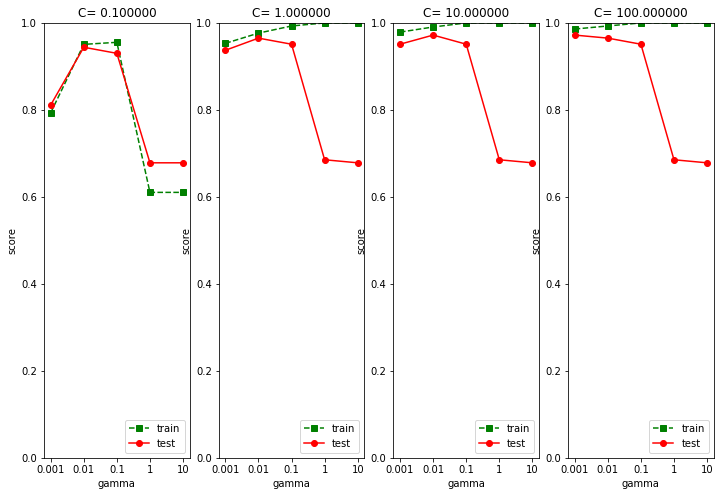

In [16]:
C = [0.1, 1, 10, 100]
gamma = [0.001, 0.01, 0.1, 1, 10]
s_train=[]
s_test=[]

for c in C:
    s1=[]
    s2=[]
    
    for g in gamma:
        model=SVC(C=c,gamma=g)
        model.fit(X_train_norm,y_train)

        pred_y=model.predict(X_test_norm)
        s1.append(model.score(X_train_norm,y_train))
        s2.append(model.score(X_test_norm,y_test))
        
    s_train.append(s1)
    s_test.append(s2)
    
fig = plt.figure(figsize=[12,8])
for i in range(len(C)):
    plt.subplot(1,len(C),i+1)
    plt.plot(s_train[i],'gs--',label='train')
    plt.plot(s_test[i],'ro-',label='test')
    plt.title('C= %f' % (C[i]))
    plt.xticks(range(len(gamma)),gamma)
    plt.ylim(0,1)
    plt.xlabel('gamma')
    plt.ylabel('score')
    plt.legend(loc='lower right')

In [20]:
for i in s_test:
    print(i)

[0.8111888111888111, 0.9440559440559441, 0.9300699300699301, 0.6783216783216783, 0.6783216783216783]
[0.9370629370629371, 0.965034965034965, 0.951048951048951, 0.6853146853146853, 0.6783216783216783]
[0.951048951048951, 0.972027972027972, 0.951048951048951, 0.6853146853146853, 0.6783216783216783]
[0.972027972027972, 0.965034965034965, 0.951048951048951, 0.6853146853146853, 0.6783216783216783]


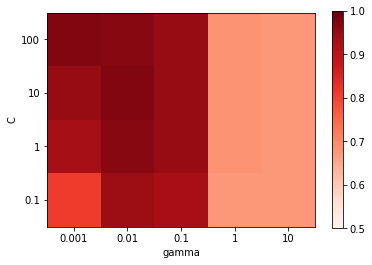

In [24]:
plt.imshow(s_test,vmin=0.5, vmax=1,origin='lower', cmap='Reds')
plt.xticks(range(5),gamma)
plt.yticks(range(4),C)
plt.ylabel('C')
plt.xlabel('gamma')
plt.colorbar()

- 마지막으로, 시각화를 위해 속성 2개를 선택해 SVC 를 적용해 보겠습니다.

In [27]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

In [42]:
col1 = 0 #20
col2 = 1 #27

X = cancer.data[:,[col1,col2]]
y = cancer.target

X_train,X_test,y_train,y_test = train_test_split(X, y)

X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)

X_train_norm = (X_train-X_mean)/X_std
X_test_norm = (X_test-X_mean)/X_std

model = SVC(C=0.1, gamma='auto', probability=True) # 확률 점수를 얻기 위해 probability=True
#model = SVC(probability=True)
model.fit(X_train_norm, y_train)

# 점수를 출력
train_score = model.score(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
display(train_score, test_score)

0.9248826291079812

0.8671328671328671

In [43]:
model.support_vectors_.shape

(186, 2)

In [44]:
model.predict_proba(X_test_norm)

array([[0.99341341, 0.00658659],
       [0.96128381, 0.03871619],
       [0.06890765, 0.93109235],
       [0.61954501, 0.38045499],
       [0.05485363, 0.94514637],
       [0.0482125 , 0.9517875 ],
       [0.99348611, 0.00651389],
       [0.02039209, 0.97960791],
       [0.02905282, 0.97094718],
       [0.0225701 , 0.9774299 ],
       [0.01655659, 0.98344341],
       [0.18902907, 0.81097093],
       [0.99630385, 0.00369615],
       [0.04322957, 0.95677043],
       [0.02103962, 0.97896038],
       [0.02094365, 0.97905635],
       [0.02272653, 0.97727347],
       [0.97029711, 0.02970289],
       [0.03028765, 0.96971235],
       [0.06950366, 0.93049634],
       [0.0187433 , 0.9812567 ],
       [0.02565202, 0.97434798],
       [0.99495111, 0.00504889],
       [0.02786148, 0.97213852],
       [0.02472195, 0.97527805],
       [0.99138383, 0.00861617],
       [0.01698197, 0.98301803],
       [0.03610014, 0.96389986],
       [0.01863663, 0.98136337],
       [0.05420259, 0.94579741],
       [0.

Text(0.5,1,'SVM - decision bounds')

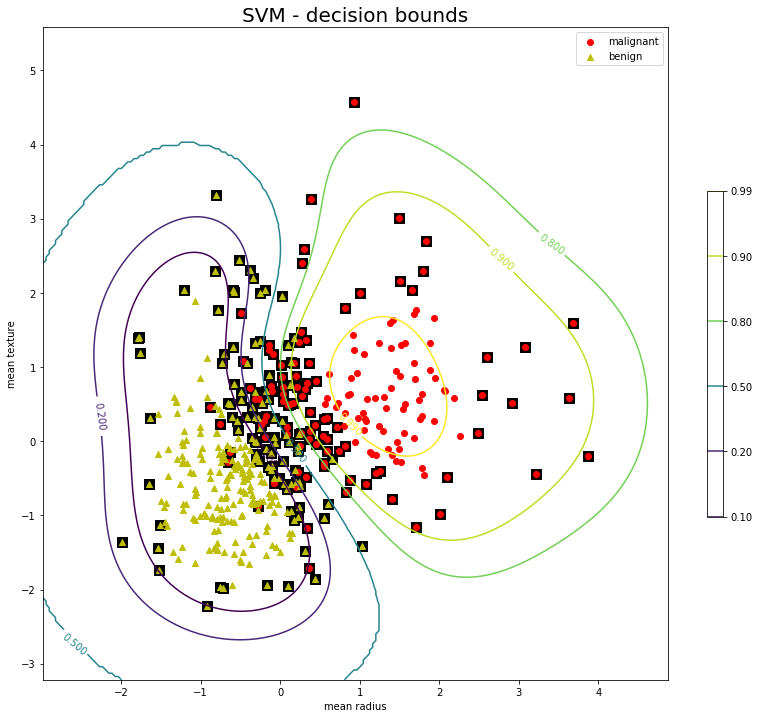

In [45]:
# fit() 결과를 등고선으로 나타낸다
xmax = X_train_norm[:,0].max()+1
xmin = X_train_norm[:,0].min()-1
ymax = X_train_norm[:,1].max()+1
ymin = X_train_norm[:,1].min()-1

xx=np.linspace(xmin,xmax,200)
yy=np.linspace(ymin,ymax,200)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]

decision_values = model.predict_proba(X_grid)[:,0] # 등고선을 위해 확률점수를 구함

sv=model.support_vectors_

fig=plt.figure(figsize=[14,12])

# show probability countour
CS=plt.contour(data1,data2,decision_values.reshape(data1.shape),levels=[0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99])
plt.clabel(CS, inline=2, fontsize=10)

# show support vectors
plt.scatter(sv[:,0], sv[:,1], marker='s', c= 'k', s=100)

# show train samples
plt.scatter(X_train_norm[:,0][y_train==0],X_train_norm[:,1][y_train==0],marker='o',c='r',label='malignant')
plt.scatter(X_train_norm[:,0][y_train==1],X_train_norm[:,1][y_train==1],marker='^',c='y',label='benign')

plt.legend()
plt.colorbar(CS,shrink=0.5)
plt.xlabel(cancer.feature_names[col1])
plt.ylabel(cancer.feature_names[col2])
plt.title('SVM - decision bounds',fontsize=20)

In [46]:
display(sv.shape, sv[:10])

(186, 2)

array([[ 0.58469227, -0.13436415],
       [ 3.07530384,  1.27667794],
       [ 0.80934654, -0.06312261],
       [-0.49697645,  1.7248102 ],
       [ 1.79394243,  2.2924444 ],
       [ 0.36835853,  1.05605898],
       [ 0.37945256,  0.39650022],
       [ 1.70796363, -1.15242873],
       [ 0.34339694,  0.7825834 ],
       [ 0.53754261,  0.06786989]])

In [47]:
model.predict_proba([[0,0]])

array([[0.33702512, 0.66297488]])